## Part 1: Introduction



Import libraries

In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

## Part 2: Data Curation

### **Loading Dataset**

https://pubmed.ncbi.nlm.nih.gov/2756873/ describe study/dataset here
# EXPLAIN DATASET HERE AND IN DETAIL

We are going to be using the cleve.mod file from our UCI dataset which we can download from https://archive.ics.uci.edu/dataset/45/heart+disease. It is a plain text file that has data for each patient as 14 variables that are space delimited text. The 14 variable names and info can be found on the UCI heart disease site. Before parsing our file, let's initialize our dataframe columns with our variables.

In [258]:
# These are our variables from the UCI Heart Disease dataset
variable_names = ["age",
"sex",
"cp",
"trestbps",
"chol",
"fbs",
"restecg",
"thalach",
"exang",
"oldpeak",
"slope",
"ca",
"thal", 
"heart_disease", 
"stage"]

# Create an empty DataFrame with feature/target as columns
df = pd.DataFrame(columns=variable_names)


Now lets read our cleve.mod file  into our dataframe. We will have to do some parsing since it's a plain old text file.

In [259]:
# Read in the cleve.mod file
f = open("./cleve.mod")
if f: 
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        # Skip empty lines and lines that start with % (they are comments) 
        if line and line[0] != "%" :
            data = []
            # Split the line by whitespace 
            for value in line.split():
                data.append(value)
                
            # Add the data to the dataframe
            df.loc[len(df)] = data
                

# Lets look at our data
display(df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease,stage
0,63.0,male,angina,145.0,233.0,true,hyp,150.0,fal,2.3,down,0.0,fix,buff,H
1,67.0,male,asympt,160.0,286.0,fal,hyp,108.0,true,1.5,flat,3.0,norm,sick,S2
2,67.0,male,asympt,120.0,229.0,fal,hyp,129.0,true,2.6,flat,2.0,rev,sick,S1
3,37.0,male,notang,130.0,250.0,fal,norm,187.0,fal,3.5,down,0.0,norm,buff,H
4,41.0,fem,abnang,130.0,204.0,fal,hyp,172.0,fal,1.4,up,0.0,norm,buff,H


Yay! We were able to succesfully convert our dataset from a plain text file to a dataframe. But what do all these variables mean? Let's look at our handy table below to figure that out. 

<br>

<table style="font-size: 12px; border-collapse: collapse; width: 100%; text-align: left;">
    <thead>
        <tr>
            <th style="border: 1px solid black; padding: 5px;">Variable</th>
            <th style="border: 1px solid black; padding: 5px;">Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="border: 1px solid black; padding: 5px;">age</td>
            <td style="border: 1px solid black; padding: 5px;">Age of the patient in years</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 5px;">sex</td>
            <td style="border: 1px solid black; padding: 5px;">Gender of the patient</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 5px;">cp</td>
            <td style="border: 1px solid black; padding: 5px;">Chest pain type of angina (Typical angina), abnang (Abnormal angina), notang (Non-anginal pain), and asympt (Asymptomatic/No pain)</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 5px;">trestbps</td>
            <td style="border: 1px solid black; padding: 5px;">Resting blood pressure in mm Hg</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 5px;">chol</td>
            <td style="border: 1px solid black; padding: 5px;">Cholesterol in mg/dl</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 5px;">fbs</td>
            <td style="border: 1px solid black; padding: 5px;">Fasting blood sugar level, categorized as true if above 120 mg/dl and false otherwise</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 5px;">restecg</td>
            <td style="border: 1px solid black; padding: 5px;">Resting electrocardiographic results where norm: Normal, abn: Having ST-T wave abnormality, hyp: Showing probable or definite left ventricular hypertrophy</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 5px;">thalach</td>
            <td style="border: 1px solid black; padding: 5px;">Maximum heart rate achieved during a thalium stress test</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 5px;">exang</td>
            <td style="border: 1px solid black; padding: 5px;">Exercise-induced angina/chest pain (true = yes, false = no)</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 5px;">oldpeak</td>
            <td style="border: 1px solid black; padding: 5px;">ST depression induced by exercise relative to rest</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 5px;">slope</td>
            <td style="border: 1px solid black; padding: 5px;">Slope of the peak exercise ST segment: up: Upsloping, flat: Flat Slope, down: Downsloping</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 5px;">ca</td>
            <td style="border: 1px solid black; padding: 5px;">Number of major vessels (0-4) colored by fluoroscopy</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 5px;">thal</td>
            <td style="border: 1px solid black; padding: 5px;">Thalium stress test result of norm (Normal), fix (Fixed defect), rev (Reversible defect)</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 5px;">heart_disease</td>
            <td style="border: 1px solid black; padding: 5px;">Buff means patient is healthy, while sick means patient has heart disease</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 5px;">stage</td>
            <td style="border: 1px solid black; padding: 5px;">Stage of heart disease where H is healthy and S indicates heart disease with S1-S4 being least to most severe</td>
        </tr>
    </tbody>
      <tfoot>
  </tfoot>
</table>
<i style="font-size: 12px;">Angina: chest pain caused by reduced blood flow to the heart</i>
<br>
<i style="font-size: 12px;">ST:  portion of electrocardiogram graph that is often related to heart conditions
</i>
<br>
<i style="font-size: 12px;">Thalium stress test:  cardiac stress test induced either through physical exercise or intravenous pharmacological stimulation
</i>


So our variables are comprised of two demographic ones (age and sex) and the rest are clinical metrics like ECG readings or blood pressure that are likely related to heart disease. We also have a mix of both categorical variables like sex and continuous ones like cholesterol levels. Our target variable that we will try to predict with our model is heart_disease. We could have our model try to predict the stage of heart disease as well but we'll keep things simple for our model so that it can give us the best prediction, We'll just focus on classifying whether a patient has heart disease or not.   

### **Check For Missing Values**

Let's have a quick look somewhere in the middle of our data 

In [260]:
display(df.iloc[80: 85]) 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease,stage
80,44.0,male,notang,140.0,235.0,fal,hyp,180.0,fal,0.0,up,0.0,norm,buff,H
81,47.0,male,notang,138.0,257.0,fal,hyp,156.0,fal,0.0,up,0.0,norm,buff,H
82,53.0,fem,notang,128.0,216.0,fal,hyp,115.0,fal,0.0,up,0.0,?,buff,H
83,53.0,fem,asympt,138.0,234.0,fal,hyp,160.0,fal,0.0,up,0.0,norm,buff,H
84,51.0,fem,notang,130.0,256.0,fal,hyp,149.0,fal,0.5,up,0.0,norm,buff,H


Oh no! It looks like row 82 has a question mark for its thal variable. We most likely have missing data in our dataset which is marked with question marks. Lets remove all rows that have missing data. 

In [261]:
# Lets validate each row and remove any rows with missing values 

# Mark a row valid if it doesn't have ? 
df["Valid_Row"] = df.apply(lambda x: False if ("?" in list(x)) else True, axis=1)
# filter the df based on valid rows 
df = df[df["Valid_Row"]]
# finally remove the temporary column we created
df = df.drop("Valid_Row", axis=1)

display(df.iloc[80:85])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease,stage
80,44.0,male,notang,140.0,235.0,fal,hyp,180.0,fal,0.0,up,0.0,norm,buff,H
81,47.0,male,notang,138.0,257.0,fal,hyp,156.0,fal,0.0,up,0.0,norm,buff,H
83,53.0,fem,asympt,138.0,234.0,fal,hyp,160.0,fal,0.0,up,0.0,norm,buff,H
84,51.0,fem,notang,130.0,256.0,fal,hyp,149.0,fal,0.5,up,0.0,norm,buff,H
85,66.0,male,asympt,120.0,302.0,fal,hyp,151.0,fal,0.4,flat,0.0,norm,buff,H


Yay! We succesfully deleted all the rows that have a question mark as one of their values. Now lets check the types of our variables in the dataframe. 

In [262]:
print(df.dtypes)

age              object
sex              object
cp               object
trestbps         object
chol             object
fbs              object
restecg          object
thalach          object
exang            object
oldpeak          object
slope            object
ca               object
thal             object
heart_disease    object
stage            object
dtype: object


It looks like some of our continuous variables like age or cholesterol got set as an object/string. That would cause some issues when we try to train our model or plot data. Let's convert them to the correct type

In [263]:
# Specify continuous variables we want to convert 
continuous_variables = ["age",
"trestbps",
"chol",
"thalach",
"oldpeak"]

# Convert continuous variables to float
df[continuous_variables] = df[continuous_variables].apply(lambda x: x.astype(float))
print(df.dtypes)

age              float64
sex               object
cp                object
trestbps         float64
chol             float64
fbs               object
restecg           object
thalach          float64
exang             object
oldpeak          float64
slope             object
ca                object
thal              object
heart_disease     object
stage             object
dtype: object


Nice! Now all our continuous variables are in the correct type. But we still have categorical variables that are not encoded. We will need to encode them before we can train our model, but before that let's do some exploratory data analysis to see if we can find any interesting patterns in our data.

## Part 3: Exploratory Data Analysis

### **Visualizing Distributions** 
Now that we have our data in a good format, let's do some exploratory data analysis. We will start by looking at the distribution of our target variable. 

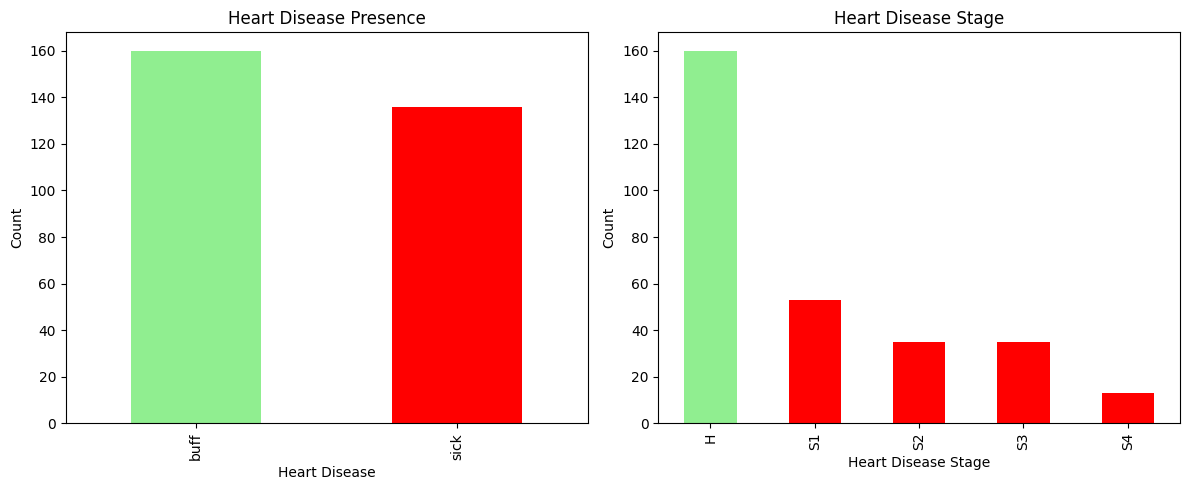

In [264]:
heart_disease_counts = df['heart_disease'].value_counts()
stage_counts = df['stage'].value_counts()

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Heart disease distribution
heart_disease_counts.plot(kind='bar', ax=axes[0], color=['lightgreen','red'], title='Heart Disease Presence')
axes[0].set_xlabel('Heart Disease')
axes[0].set_ylabel('Count')

# Heart disease stage distribution
stage_counts.plot(kind='bar', ax=axes[1], color=(['lightgreen'] +["red"]*4), title='Heart Disease Stage')
axes[1].set_xlabel('Heart Disease Stage')
axes[1].set_ylabel('Count')
plt.tight_layout()

plt.show()


Looking at our plots, we see that our data for our target variable isn't very skewed. There are slightly more patients without heart disease (buff) than with heart disease (sick), but the distribution is fairly even. We also see that among the patients with heart disease, patients with stage 4 heart disease are the least common.

We can also look at the distribution of chest pain experienced by patients in relation to heart disease



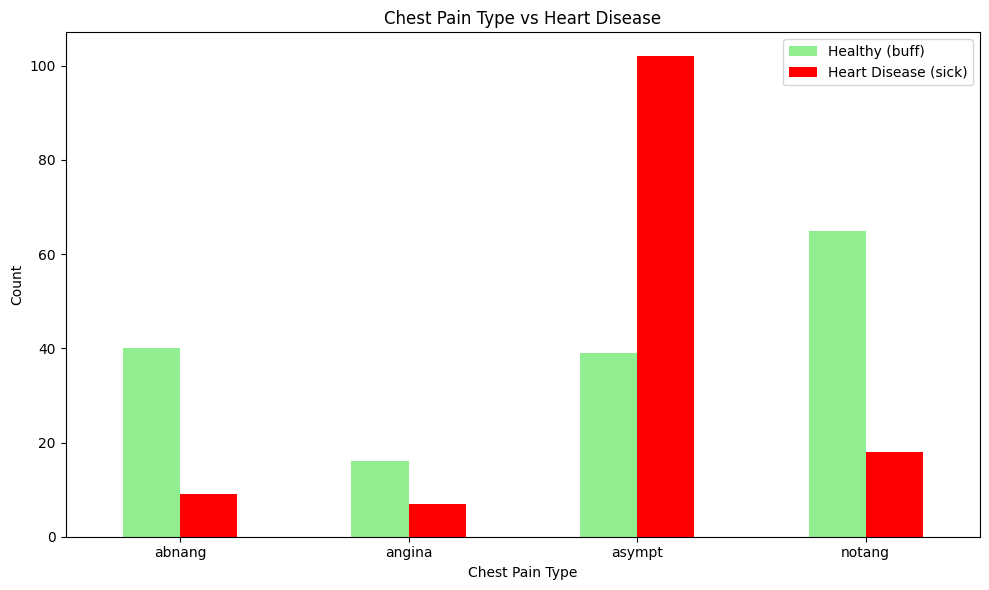

In [265]:
# Group heart disease data by chest pain type
cp_heart_disease = pd.crosstab(df['cp'], df['heart_disease'])

# Plot grouped bar chart
cp_heart_disease.plot(kind='bar', figsize=(10, 6), color=['lightgreen', 'red'], title='Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend( labels=['Healthy (buff)', 'Heart Disease (sick)'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Very interesting! It looks like most patients with heart disease have asymptomatic chest pain, meaning they don't experience any pain or symptoms at all. In contrast, we  see that patients without heart disease seem to be spread out around the different types of chest pain, but for some reason, those with heart disease are all concentrated in the asymptomatic category. 

Now let's look at the distribution of our demographic variables: gender and age

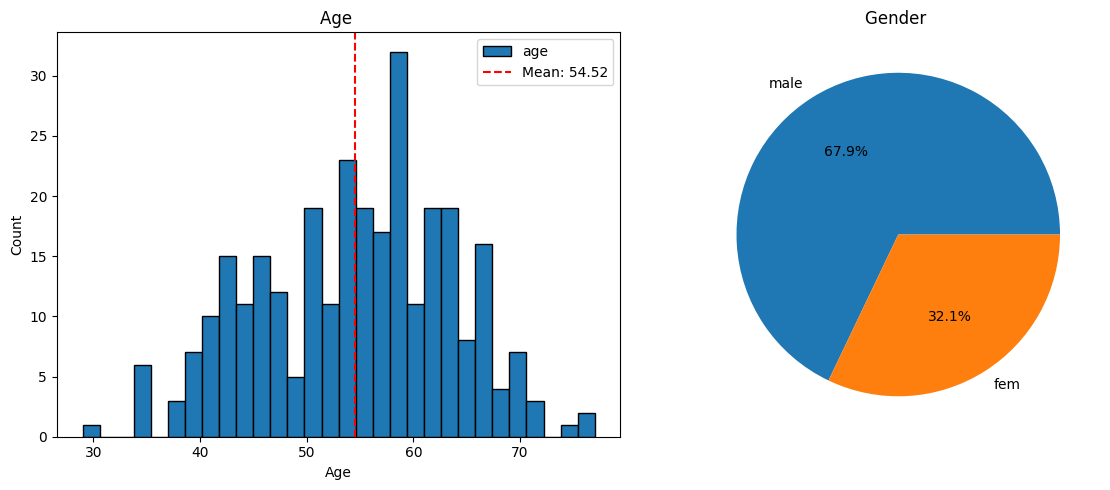

In [266]:
# Plot them side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Age histogram
df['age'].plot(kind='hist', bins=30, ax=axes[0], edgecolor='black', title='Age ')
axes[0].axvline(df['age'].mean(), color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {df["age"].mean():.2f}')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].legend()

# Pie chart for gender
df['sex'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', title='Gender ')
axes[1].set_ylabel('')  # Remove y-axis label for pie chart

plt.tight_layout()
plt.show()

We see that most patients are around their 50s and 60s, with only a few younger patients in their 20s and 30s. For gender, we see a predominately male population with only ~30% of the patients being female. Overall, we see that our patients tend to be on the older side and are majority male.

What about the distribution of our medical measurements like blood pressure and cholesterol levels? Well, let's take a look at them. 

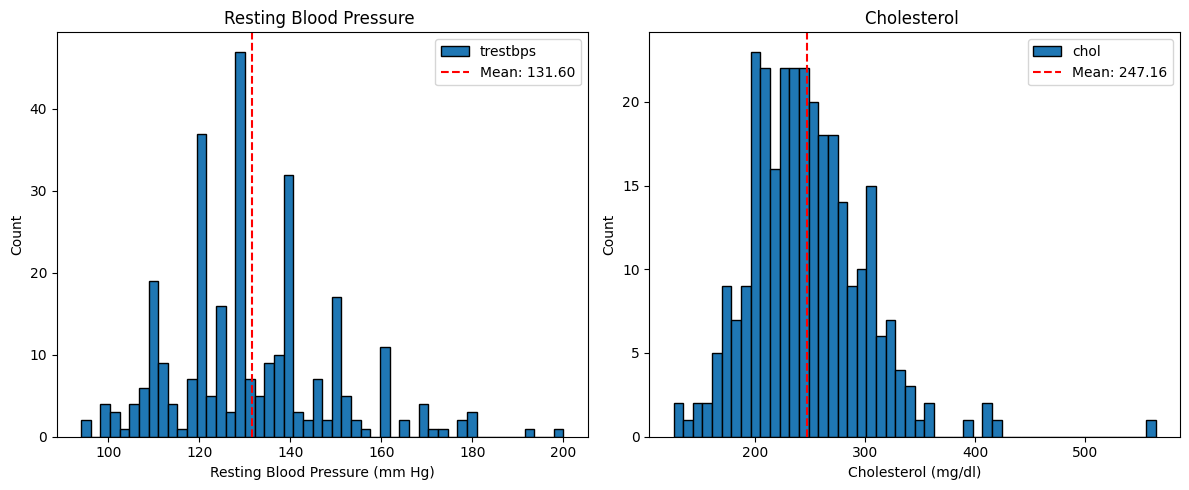

In [267]:
# Get means
mean_trestbps = df['trestbps'].mean()
mean_chol = df['chol'].mean()

# Plot histograms side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for resting blood pressure
df['trestbps'].plot(kind='hist', bins=50, ax=axes[0], edgecolor='black', title='Resting Blood Pressure ')
axes[0].axvline(mean_trestbps, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_trestbps:.2f}')
axes[0].set_xlabel('Resting Blood Pressure (mm Hg)')
axes[0].set_ylabel('Count')
axes[0].legend()

# Histogram for cholesterol
df['chol'].plot(kind='hist', bins=50, ax=axes[1], edgecolor='black', title='Cholesterol ')
axes[1].axvline(mean_chol, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_chol:.2f}')
axes[1].set_xlabel('Cholesterol (mg/dl)')
axes[1].set_ylabel('Count')
axes[1].legend()

plt.tight_layout()
plt.show()

For the cholesterol distribution, we see that there are one or two outliers with very high cholesterol levels (> 500 mg/dl), but for the most part, the cholesterol levels are fairly evenly distributed with a mean of 248 mg/dl. For our resting blood pressure graph, we see that the distribution is not normal at all and has a lot of pronounced spikes in count at certain blood pressures. This might be due to the way the blood pressure was measured like some tendency of the measurement device to round to the nearest 5 mm Hg, but we don't really know for certain.


### **Hypothesis Testing**
Now that we have a good understanding of the distribution of our dataset, let's look at the the significance of some of our variables with respect to heart disease

#### Age and Heart Disease: Is it significant?
Let's try to find out if age is truly significant when it comes to having heart disease. We can do this by conducting a t-test to compare the mean age between patients with and without heart disease. We'll have a 5% significance level and use a two tailed t-test. We'll define our hypothesis as follows:  

H0: The difference between the mean age of patients with and without heart disease is 0

HA: The difference between means is not 0

In [268]:
# Seperate our age data into two groups based on heart disease
group_0 = df[df["heart_disease"] == "buff"]['age']
group_1 = df[df["heart_disease"] == "sick"]['age']

# Perform two tailed t-test comparing mean of both groups
stat, p_value = stats.ttest_ind(group_0, group_1, equal_var=False)
display(f"T-test results for Age distribution: t-stat={stat:.3f}, p-value={p_value:.3f}")



'T-test results for Age distribution: t-stat=-4.028, p-value=0.000'

We end up with a p-value less than our significance level (.05), so we end up rejecting our null hypothesis and accepting our alternate hypothesis which indicates that there is a significant difference between means in our two groups. 

Let's visualize this as well by creating a histplot for each group

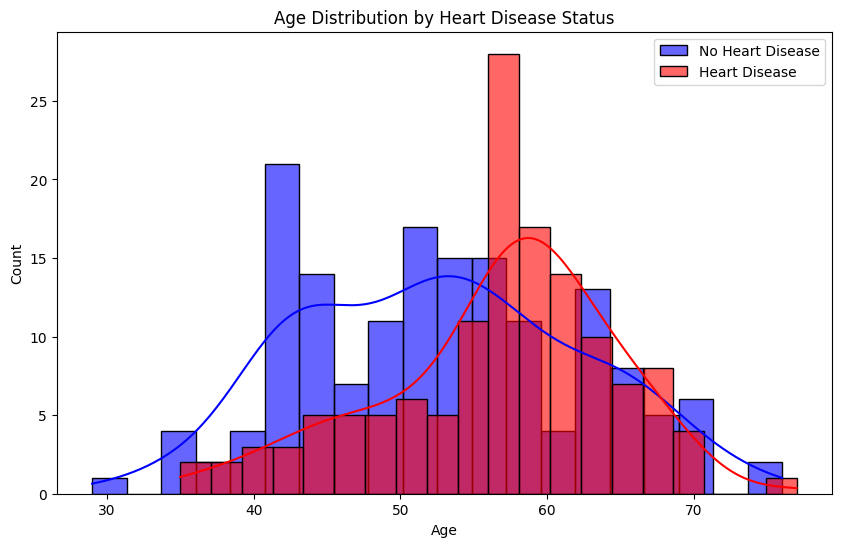

In [269]:
plt.figure(figsize=(10, 6))
sns.histplot(group_0, label="No Heart Disease", color="blue", kde=True, bins=20, alpha=0.6)
sns.histplot(group_1, label="Heart Disease", color="red", kde=True, bins=20, alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution by Heart Disease Status")
plt.legend()
plt.show()




Looking at the graph, it's pretty clear that the age of a patient is significantly correlated to whether or not they have heart disease. this makes sense since usually older patients are more at risk to diseases like heart disease. We can see this trend in histogram/lineplot graph where the no heart disease group is cleary skewed towards the lower/younger ages.

#### What about Gender?
We know that age is significant, but is our other demographic variable, gender, significant as well? Let's conduct a chi squared test in order to see the effect between our categorical variable, gender, and the presence of heart disease. We'll have the same significance level as before and and our hypothesis is: 

H0: There is no relationship between type of gender and the presence of heart disease 

HA: There is a relationship between the type of gender and the presence of heart disease 

In [270]:
# Get crosstab which  splits gender by whether or not they have heart disease
# We reindex to ensure we have True and False in the columns
gender_heart_disease = pd.crosstab(df["sex"], df['heart_disease']  == "sick").reindex([True, False],axis="columns")
# Then we can just pass our crosstab to the chi2 function 
chi2, p, dof, expected = stats.chi2_contingency(gender_heart_disease)

print(f"Chi-square test for Gender vs Heart Disease: chi2={chi2:.3f}, p-value={p:.3f}")

Chi-square test for Gender vs Heart Disease: chi2=22.886, p-value=0.000


We end up with a p-value less than our sig. level, so we end up rejecting our null hypothesis and accepting our HA, indicating that there is a significant association between gender and presence of heart disease. 

Let's visualize again. We'll make a stacked bar chart for Male and Female and have each bar represent the porportion of that gender with and without heart disease.

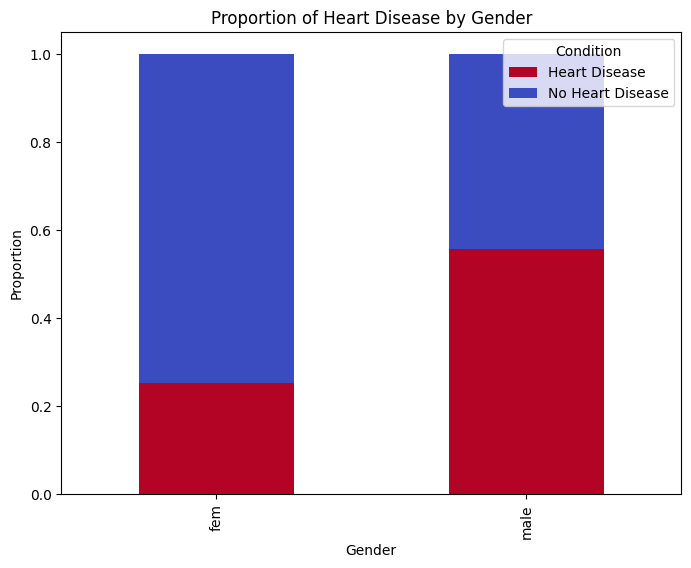

In [271]:
# We want the porportion of heart disease for each gender
# We can get that by diving the gender_heart_disease crosstab by the sum of each row 
heart_disease_sum  = gender_heart_disease.sum(axis=1)
heart_disease_porportions = gender_heart_disease.div(heart_disease_sum, axis=0)
# Plot the proportions
heart_disease_porportions.plot(kind='bar', stacked=True, colormap='coolwarm_r', figsize=(8, 6))
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.title("Proportion of Heart Disease by Gender")
plt.legend(["Heart Disease", "No Heart Disease"], title="Condition")
plt.show()

We observe that our bar graph, which shows the porportion of heart disease for each gender, fits our results from the chi squared test really well since it's clear to see that the porportion of Males with heart disease is significantly higher than that of Females. 


# Maybe add in another hypothesis test

Now that we have a pretty good idea about how our data looks and how our features are significant, we can move on to the fun part of our project: building a classification model to predict heart disease.



## Part 4: Primary Analysis: Classification



Before we continue let's separate our dataset into X, our features, and y, our target variable. Since we aren't going to be using the heart disease stage variable, we will drop it as well.  

In [272]:
y = df["heart_disease"]
X = df.drop(columns=["heart_disease", "stage"])


### **Dealing With Categorical Variables**

Before we can train our model, we need to deal with our categorical variables so that our models can understand them. Dealing with our target variable heart_disease is easy since it's binary, we just assign 1 for sick which indicates heart disesase and 0 for buff (no heart disease). But what do we do for variables like chest pain which is categorical but not binary (has more than two values)? That's where one hot encoding comes in. One hot encoding is a way to convert categorical variables into binary variables so that our models can understand them. 

For example, if we have a categorical variable with three values (A, B, C), we can create three new binary variables (A, B, C) where each variable is 1 if the original variable was that value and 0 otherwise. So if our original variable was A, then A would be 1 and B and C would be 0. If you want to learn more about one hot encoding, you can read about it <a href="https://machinelearningmastery.com/one-hot-encoding-understanding-the-hot-in-data/">here</a>.

Now let's encode our categorical variables! 

In [273]:
# Transform the target variable to binary (1 for sick, 0 for buff)
y = y.apply(lambda x: 1 if x == "sick" else 0)

# Convert categorical variables to dummy variables using One-Hot Encoding
# use dtype=int or we'll get as True and False 
X = pd.get_dummies(X, drop_first=True, dtype=int)
print(X.head())

    age  trestbps   chol  thalach  oldpeak  sex_male  cp_angina  cp_asympt  \
0  63.0     145.0  233.0    150.0      2.3         1          1          0   
1  67.0     160.0  286.0    108.0      1.5         1          0          1   
2  67.0     120.0  229.0    129.0      2.6         1          0          1   
3  37.0     130.0  250.0    187.0      3.5         1          0          0   
4  41.0     130.0  204.0    172.0      1.4         0          0          0   

   cp_notang  fbs_true  restecg_hyp  restecg_norm  exang_true  slope_flat  \
0          0         1            1             0           0           0   
1          0         0            1             0           1           1   
2          0         0            1             0           1           1   
3          1         0            0             1           0           0   
4          0         0            1             0           0           0   

   slope_up  ca_1.0  ca_2.0  ca_3.0  thal_norm  thal_rev  
0        

First, we transformed our target variable heart_disease into a binary variable. We assigned 1 to sick and 0 to buff. Then we used the`get_dummies` function from pandas to perform One-Hot-Enconding. The function creates a new column for each category in our categorical variable and assign a 1 or 0 to indicate whether that category is present or not. 

If we look at the results from `display(X.head())` we see that `get_dummies` created some columns for each category in our categorical variables. For example, for the chest pain variable, we have 3 new columns: cp_angina, cp_asympt, and cp_notang (note that there is no cp_abnang since we can implicitly get its value by looking at the other 3 variables). This worked exactly how we wanted it to. Now we can train our model without worrying about categorical variables!

Also if you are wondering why get_dummies did not encode age, trestbps, or our other continuous variables despite passing in the whole dataframe `X` to the function, it's because `get_dummies` looks at the `dtype` for each column and only encodes the object/string ones. Since we already converted our continuous variables to the correct type, we didn't have to worry about them being encoded. 

### **Splitting the Data**
Now that we have our data in a good format, we can split our data into training and testing sets. We will use 80% of our data for training and 20% for testing. We will set a random state so that we can reproduce our results. 

In [274]:
# seed for reproducing results
seed = 31
# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

We use `train_test_split` from sklearn to split our data. The function takes in our features `X`, target variable `y`, and the test size as a fraction of the total data. It returns 4 variables: X_train, X_test, y_train, and y_test which are our training and testing sets for features and target variable respectively.

Now we are going to normalize our features. It's important because it helps our model converge faster and perform better, without any one feature overshadowing the others. We will use the `StandardScaler` from sklearn to normalize our data. The `StandardScaler` standardizes features by removing the mean and scaling to unit variance, essentially transforming the data into a z-score. A very important thing that's easy to miss is that we need to fit our scaler on the `X_train` only and then transform the `X_train` and `X_test` data. If we were to fit the scaler on the original unsplit `X` data, we would be leaking information from our test set into our training set which could cause our model to overfit and perform poorly on unseen data.

In [275]:
StandardScaler = StandardScaler()
# Fit the scaler to the training data
StandardScaler.fit(X_train)
# Transform the training data
X_train_scaled = StandardScaler.transform(X_train)
# Transform the testing data 
X_test_scaled = StandardScaler.transform(X_test)
# NOTE: We use the same scaler fitted on the training data to transform the test data


We succesfully normalized our data! 

Now we can move on to the fun part of our project: building a classification model to predict heart disease. We are going to be using Random Forest Classifier from sklearn. Random Forest is an ensemble learning method that combines multiple decision trees to improve the accuracy of the model. It works by creating a forest of decision trees and averaging their predictions to make a final prediction. Random Forest is a great choice for our dataset because it can handle both categorical and continuous variables, and it is less prone to overfitting than a single decision tree. 

You can learn more about it <a href="https://www.ibm.com/think/topics/random-forest">here</a>.

In [285]:
rand_forest = RandomForestClassifier(random_state=seed)

Now we are going to perform k-fold cross validation to evaluate our model. K-fold cross validation is a technique that splits our data into k subsets and trains the model k times, each time using a different subset as the test set and the rest as the training set. It helps us to get a better idea of how our model will perform on the datset and is super useful for things like tuning hyperparameters or comparing performance between different models. 

For our case we will use 5 folds. We will use the `cross_val_score` function from sklearn to perform the cross validation along with `StratifiedKFold` which creates our folds in a way that ensures that each fold has the same proportion of classes as the original dataset. corss_val_score takes in our model, features, target variable, the number of folds as parameters. It returns an array of scores for each fold, where the scores represent the accuracy of our model. We will use the mean of the scores as our final score for the model.

In [286]:
k_folds = 5 
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=seed)
# 
# Use np.random since cross_val_score doesn't take random_state 
np.random.seed(seed)
score = cross_val_score(rand_forest, X_train_scaled, y_train, cv=skf, scoring = "accuracy")

print(f"Random Forest: mean score of {"{:.4f}".format(score.mean())} and std of {"{:.4f}".format(score.std())}")
print(f"Max score: {score.max()} and Min score: {score.min()}")

Random Forest: mean score of 0.8047 and std of 0.0614
Max score: 0.8958333333333334 and Min score: 0.723404255319149


The highest accuracy it acheives is 89.5% which is pretty good! Now let's train our Random Forest with the actual training data. But first we need to do hyper parameter tuning to squeeze the maximum amount of performance from our model. 

What is hyper parameter tuning? Hyper parameter tuning is the process of finding the best set of hyper parameters for our model. Hyper parameters are parameters that are not learned from the data but are set before training the model. For example, in Random Forest, the number of trees in the forest is a hyper parameter. 

Now how do we actually find the best set of hyper parameters? We can use cross validation! Cross validation is commonly used in combination with another technique called grid search to find the best set of hyper parameters. Grid search is a brute force method that tests all possible combinations of hyper parameters and returns the best set of hyper parameters based on cross validation scores. 

We will use the `GridSearchCV` function from sklearn to perform hyper parameter tuning. It takes in our model, a dictionary of hyper parameters and their values to test, and the number of folds for cross validation. It returns the best set of hyper parameters and their corresponding score. 

Check this <a href="https://towardsdatascience.com/cross-validation-and-grid-search-efa64b127c1b/">article</a> out if you want to learn more about how you can tune hyperparameters with grid search and cross validation. 

In [ ]:
# Define some initial hyperparameters for tuning 
# There are many hyperparameters we can tune, but we'll do just a couple
params = {
    'n_estimators': [50, 100, 150], # number of trees in the forest
    'max_depth': [None, 10, 20], # max depth of the tree (None means no depth limit)
    'min_samples_split': [2, 5, 10],  # min num of samples required to be at a leaf node
    'min_samples_leaf': [1, 2, 4] # min num of samples required to split an internal node
}


# Perform grid search for hyperparameter tuning
np.random.seed(seed)
grid_search = GridSearchCV(rand_forest, params, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=31),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

And now we can get the best hyper parameters for our model! 

In [289]:
best_random_forest = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best hyperparameters
print(f'Best Hyperparameters: {best_params}')

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


Looks like our grid search said that the best number of trees to use is 100, the best max depth is having none, best min samples at leaves are 4, and lastly that the min samples to split is 10. 

Also, the best estimator that grid search returns is the random forest that is fitted with these optimal hyper parameters. We can use this estimator to make predictions on our test set by finally training it on our complete training set and evaluating it on our test set.

In [314]:
# Train the best random forest on the full training set
best_random_forest.fit(X_train_scaled, y_train)

# Evaluate model on test set 
y_pred = best_random_forest.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Set Accuracy: {accuracy:.4f}')

Test Set Accuracy: 0.8333


This means that our model is performing well and is not overfitting.Nice! We were able to get a final accuracy of 83.3% on our test set using this fine tuned model, which is better than the score we got before doing grid search (80.5%). 

 We can also look at the confusion matrix to see how well our model is performing. The confusion matrix shows us the number of true positives, true negatives, false positives, and false negatives for our model. We can use the `confusion_matrix` function from sklearn to create the confusion matrix.

Confusion Matrix:
Predicted   0   1
Actual           
0          28   7
1           3  22


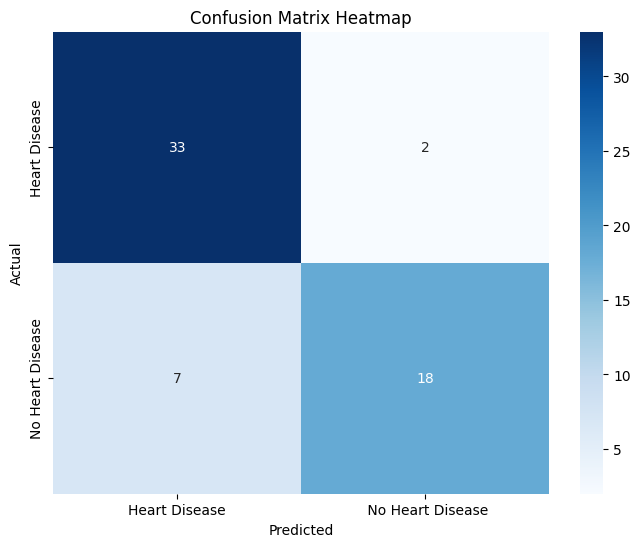

In [ ]:
# Get confusion matrix by taking cross tab of y_test and y_pred
cf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Heart Disease', ' No Heart Disease'], yticklabels=['Heart Disease', 'No Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

Looking at our confusion matrix we see that we had 7 false positives and 2 false negatives. This means that our model predicted that 7 patients had heart disease when they actually didn't and 2 patients didn't have heart disease when they actually did. This is a pretty good result since we have a lot more true positives and true negatives than false positives and false negatives. 

### **Part 5: Conclusions** 